<p>Nom et Prénom : Nguyen Quynh Nhu HO</p>
<p>Groupe : LBD</p>

<h1 style="color:green"> TP2: L’ANALYSE EN COMPOSANTES PRINCIPALES </h1>

L'objectif de ce TP est de appliquer l'Analyse en Composantes Principales (ACP) dans l'analyse de données. Le TP est divisé en deux parties principales : un exemple simple impliquant un tableau de notes d'élèves et une application du monde réel utilisant des données d'images hyperspectrales.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings, re, joblib
warnings.filterwarnings("ignore")
import os
os.environ['OMP_NUM_TREADS'] = '1'

<h2>1. ACP : Exemple simple</h2>

<h3>1.1 Pré-étude des données</h3>

<h4>Charger les données dans le tableau notes "notes.csv"</h4>

In [2]:
# Charger les données depuis le fichier CSV
df = np.transpose(pd.read_csv("notes.csv", delimiter=";", header=0, index_col=0))

<h4>Créer les vecteurs des noms des individus et des noms des variables</h4>

In [3]:
# Vecteurs des noms des individus et des noms des variables
nomi = list(df.index) # nom des variables
nomv = list(df.columns) # nom des individus

In [4]:
print(df)

          math  scie  fran  lati  d-m 
jean       6.0   6.0   5.0   5.5   8.0
aline      8.0   8.0   8.0   8.0   9.0
annie      6.0   7.0  11.0   9.5  11.0
monique   14.5  14.5  15.5  15.0   8.0
didier    14.0  14.0  12.0  12.5  10.0
andreas   11.0  10.0   5.5   7.0  13.0
pierre     5.5   7.0  14.0  11.5  10.0
brigitte  13.0  12.5   8.5   9.5  12.0
evelyne    9.0   9.5  12.5  12.0  18.0


In [5]:
df.dtypes

math    float64
scie    float64
fran    float64
lati    float64
d-m     float64
dtype: object

<h4>Représenter graphiquement la matière "français"</h4>

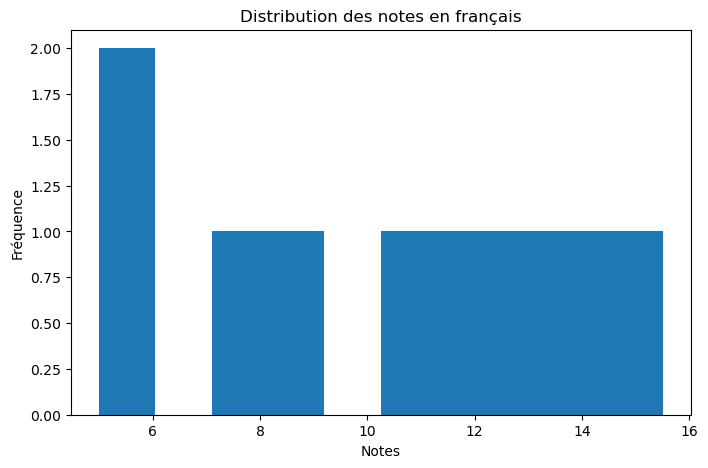

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df["fran"])
plt.xlabel("Notes")
plt.ylabel("Fréquence")
plt.title("Distribution des notes en français")
plt.show()

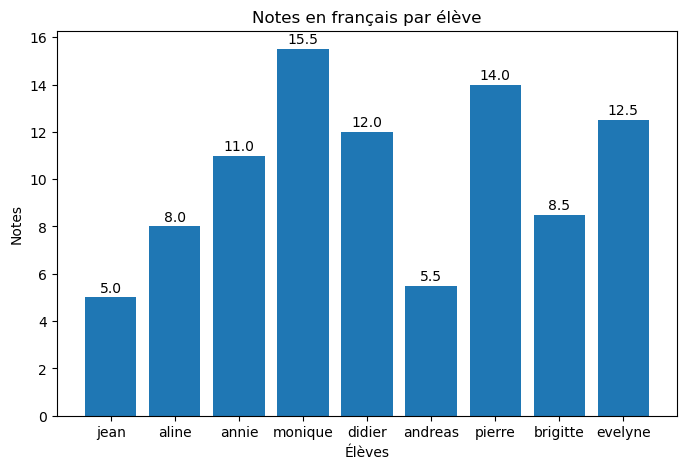

In [7]:
# Créer un diagramme en barres pour la matière "français"
plt.figure(figsize=(8, 5))
plt.bar(nomi, df['fran'])

# Ajouter les notes au-dessus de chaque barre
for i, note in enumerate(df['fran']):
    plt.text(i, note + 0.1, str(note), ha='center', va='bottom')
    
plt.title('Notes en français par élève')
plt.xlabel('Élèves')
plt.ylabel('Notes')
plt.show()

In [8]:
# La moyenne
moyenne = np.mean(df['fran'])

# La médiane
median = np.median(df['fran'])

# L'écart-type
ecart_type = np.std(df['fran'])

# Note maximale et minimale
note_max = np.max(df['fran'])
note_min = np.min(df['fran'])

# Afficher le résultat
print(f'Moyenne : {moyenne}')
print(f'Médiane : {median}')
print(f'Ecart-type : {ecart_type}')
print(f'Note français maximale : {note_max}')
print(f'Note français minimale : {note_min}')

Moyenne : 10.222222222222221
Médiane : 11.0
Ecart-type : 3.472999912908396
Note français maximale : 15.5
Note français minimale : 5.0


<p>En analysant le graphique en barres et les mesures statistiques pour la matière 'français':
    <ul>
        <li><strong>Mesures statistiques : </strong>
           <ol>Moyenne : la moyenne des notes en français est d'environ 10.22, indiquant une valeur centrale.</ol>
           <ol>Médiane : la médiane est de 11.0, ce qui suggère que la moitié des élèves ont obtenu des notes supérieurs à 11.0</ol>
           <ol>Ecart-type : l'écart-type de 3.47 indique une certaine dispersion des notes autour de la moyenne.</ol>
        </li>
        <li><strong>En général : </strong>
            <ol>Les mesures statistiques confirment la variabilité observée dans le graphique en barres, indiquant une certaine diversité dans les performances des élèves en français.</ol>
            <ol>La moyenne et la médiane relativement proches suggèrent une distribution relativement symétrique des notes.</ol>
            <ol>L'écart-type souligne la dispersion des notes, indiquant que certaines variations significatives existent parmi les résultats des élèves.</ol>
        </li>
    </ul>
</p>

<h4>Représenter graphiquement la matière "latin"</h4>

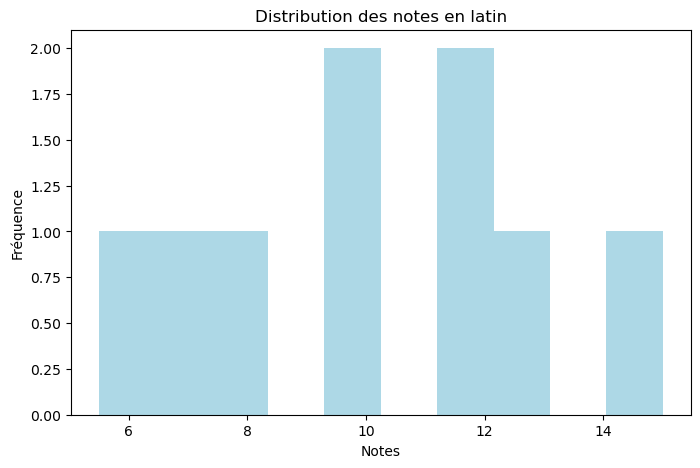

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df["lati"], color='lightblue')
plt.xlabel("Notes")
plt.ylabel("Fréquence")
plt.title("Distribution des notes en latin")
plt.show()


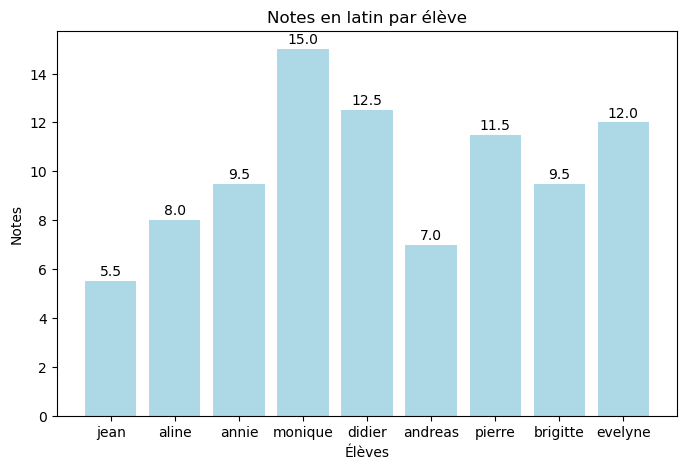

In [10]:
# Créer un diagramme en barres pour la matière "latin"
plt.figure(figsize=(8, 5))
plt.bar(nomi,  df['lati'], color='lightblue')

# Ajouter les notes au-dessus de chaque barre
for i, note in enumerate(df['lati']):
    plt.text(i, note + 0.1, str(note), ha='center', va='bottom')

plt.title('Notes en latin par élève')
plt.xlabel('Élèves')
plt.ylabel('Notes')
plt.show()

In [11]:
# La moyenne
moyenne = np.mean(df['lati'])

# La médiane
median = np.median(df['lati'])

# L'écart-type
ecart_type = np.std(df['lati'])

# Note maximale et minimale
note_max = np.max(df['lati'])
note_min = np.min(df['lati'])

# Afficher le résultat
print(f'Moyenne : {moyenne}')
print(f'Médiane : {median}')
print(f'Ecart-type : {ecart_type}')
print(f'Note latin maximale : {note_max}')
print(f'Note latin minimale : {note_min}')

Moyenne : 10.055555555555555
Médiane : 9.5
Ecart-type : 2.813108644704925
Note latin maximale : 15.0
Note latin minimale : 5.5


<p>En analysant le graphique en barres et les mesures statistiques pour la matière 'latin':
    <ul>
        <li><strong>Mesures statistiques : </strong>
           <ol>Moyenne : la moyenne des notes en latin est d'environ 10.06, indiquant une valeur centrale.</ol>
           <ol>Médiane : la médiane est de 9.5, ce qui suggère que la moitié des élèves ont obtenu des notes supérieurs à 9.5</ol>
           <ol>Ecart-type : l'écart-type de 2.81 indique une certaine dispersion des notes autour de la moyenne.</ol>
        </li>
        <li><strong>En général : </strong>
            <ol>Les mesures statistiques confirment la variabilité observée dans le graphique en barres, indiquant une certaine diversité dans les performances des élèves en latin.</ol>
            <ol>La moyenne et la médiane relativement proches suggèrent une distribution relativement symétrique des notes.</ol>
            <ol>L'écart-type souligne la dispersion des notes, indiquant que certaines variations significatives existent parmi les résultats des élèves en latin.</ol>
        </li>
    </ul>
</p>

<h4>Représenter dans un plan le nuage de points caractérisés par les deux variables "mathématique" et "sciences"</h4>

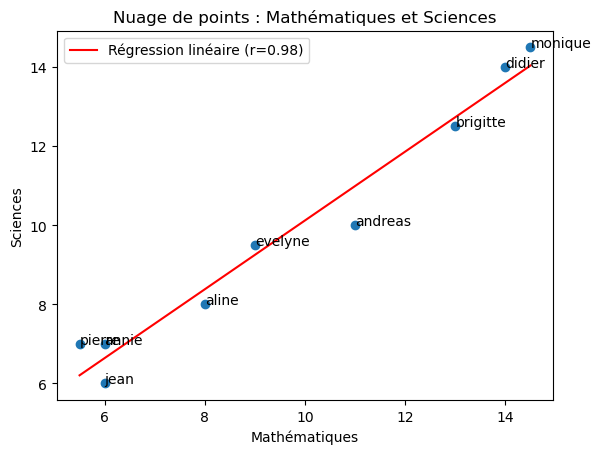

In [12]:
from scipy.stats import linregress

# Créer un nuage de points
maths = df['math']
sciences = df['scie']
plt.scatter(maths, sciences)

# Calculer la régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(maths, sciences)

# Créer la droite de régression
x_values = np.linspace(min(maths), max(maths), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label=f'Régression linéaire (r={r_value:.2f})')

# Ajouter les noms des individus 
for i in range(len(nomi)):
    plt.text(maths[i], sciences[i], nomi[i])

# Ajouter label et titre
plt.xlabel('Mathématiques')  # note en maths sur l'axe x
plt.ylabel('Sciences')  # notes en sciences sur l'axe y
plt.title('Nuage de points : Mathématiques et Sciences')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


In [13]:
# Calculer le coefficicent de corrémation de Pearson
correlation = np.corrcoef(maths, sciences)[0,1]

print(f'Le coefficient de corrélation de Person est : {correlation}')

Le coefficient de corrélation de Person est : 0.9825357286696538


<p>En observant le nuage de points représantant les notes en maths par rapport aux notes en sciences, on peut conclure : </p>
<p><strong>Tendance générale : </strong>Le nuage de points semble montrer une tandance positive, ce qui signifie qu'il y a une corrélation positive entre les notes en maths et en sciences. Cela suggère que les élèves obtenant de bonnes notes en maths ont également tendance à obtenir de bonnes notes en sciences.</p>
<p><strong>Dispersions et clusters : </strong>Bien que la tendance générale soit positive, on peut également observer une dispersion des points, indiquant une certain variabilité dans les performances des élèves. Certains élèves se démarquent avec des performances élevées dans les deux matières, tandis que d'autres peuvent avoir des performances différents.</p>
<p><strong>Corrélation quantitative : </strong>Un coefficient de corrélation de Pearson de 0.98, cela indique une relation linéaire positive forte, et suggère une similarité dans les performances des élèves dans ces deux matières.</p>

<h4>Représenter dans un plan le nuage de points caractérisés par les deux variables "mathématique" et "dessin"</h4>

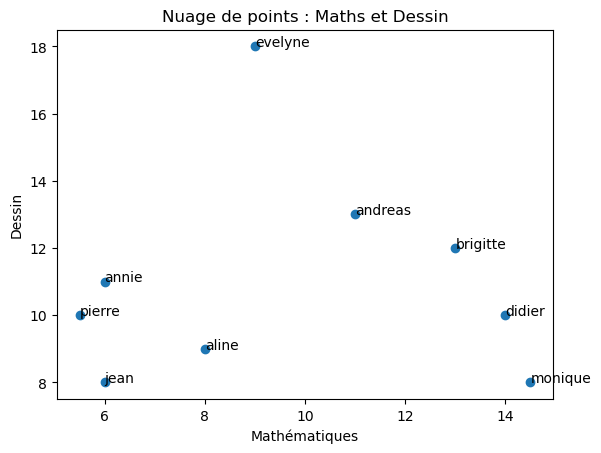

In [14]:
# Selectionner la variable "dessin"
dessin = df['d-m ']
maths = df['math']

# Créer un nuage de points
plt.scatter(maths, dessin)

# Ajouter les noms des individus à chaque point
for i in range(len(nomi)):
    plt.text(maths[i], dessin[i], nomi[i])
    
# Ajouter les labels aux axes et titre
plt.xlabel('Mathématiques')
plt.ylabel('Dessin')
plt.title('Nuage de points : Maths et Dessin')
plt.show()

In [15]:
# Calculer le coefficicent de corrémation de Pearson
correlation = np.corrcoef(maths, dessin)[0,1]

print(f'Le coefficient de corrélation de Person est : {correlation}')

Le coefficient de corrélation de Person est : 0.011183835382312352


<p>Le coefficient de corrélation de Person entre les notes en maths et en dessin est proche de 0 (0.01), ce qui indique une très faible corrélation linéaire entre ces deux variables.</p>
<p>Après cette corrélation, il n'y a pas de relation linéaire entre les performances en maths et en dessin parmi les individus. En d'autres termes, l'augmentation ou la diminution des notes en maths n'est pas associée à une augmentation ou une diminution systématique des notes en dessin et vice versa.</p>


<h3>1.2 Calcul de l'analyse en composantes principales</h3>

<h4>Calcul de la matrice centrée réduite</h4>

In [16]:
# Calculer la matrice centrée
# Fonction mean() pour calculer la moyenne de chaque colonne (matière)
matrice_centree = df - df.mean()

# Calculer la matrice centrée-réduite
# Fonction std() pour calculer l'écart-type de chaque matière
matrice_centree_reduite = matrice_centree / df.std()

# Afficher la matrice centrée-réduite
print("Matrice Centrée-Réduite :\n", matrice_centree_reduite)

Matrice Centrée-Réduite :
               math      scie      fran      lati      d-m 
jean     -1.024364 -1.208436 -1.417667 -1.526787 -0.960769
aline    -0.465620 -0.577948 -0.603263 -0.688916 -0.640513
annie    -1.024364 -0.893192  0.211142 -0.186194  0.000000
monique   1.350299  1.471139  1.432749  1.657123 -0.960769
didier    1.210613  1.313517  0.482610  0.819252 -0.320256
andreas   0.372496  0.052541 -1.281933 -1.024065  0.640513
pierre   -1.164050 -0.893192  1.025547  0.484103 -0.320256
brigitte  0.931240  0.840651 -0.467529 -0.186194  0.320256
evelyne  -0.186248 -0.105081  0.618344  0.651678  2.241794


<h4>Calcul de la matrice covariance</h4>

In [17]:
# Calcul de la matrice de covariance à partir de la matrice centrée-réduite
matrice_covariance = np.cov(matrice_centree_reduite, rowvar=False)

# Affichage de la matrice de covariance
print("Matrice de Covariance :\n", matrice_covariance)


Matrice de Covariance :
 [[1.         0.98253573 0.22673193 0.50814398 0.01118384]
 [0.98253573 1.         0.39669324 0.65153051 0.00630993]
 [0.22673193 0.39669324 1.         0.95120575 0.03803599]
 [0.50814398 0.65153051 0.95120575 1.         0.08050006]
 [0.01118384 0.00630993 0.03803599 0.08050006 1.        ]]


<h4>Effectuer une ACP sur la matrice centrée reduite</h4>

In [18]:
# Effectuer une ACP
pca = PCA()
# pca_result contient les projections
pca_result = pca.fit_transform(matrice_centree_reduite)

In [19]:
# Valeurs propres et variances expliquées
valeurs_propres = pca.explained_variance_
variance_expliquee = pca.explained_variance_ratio_
variance_cumulative = np.cumsum(variance_expliquee) * 100

# Afficher les résultats
resultats_acp = pd.DataFrame({
    'Val. propre': valeurs_propres,
    'Variance (%)': variance_expliquee * 100,
    'Variance cumulative (%)': variance_cumulative
}, index=np.arange(1, len(valeurs_propres) + 1))

print(resultats_acp)

   Val. propre  Variance (%)  Variance cumulative (%)
1     2.878226     57.564510                57.564510
2     1.134815     22.696294                80.260804
3     0.983605     19.672101                99.932904
4     0.002374      0.047475                99.980380
5     0.000981      0.019620               100.000000


<p>Les deux premières composantes principales (CP1 et CP2) expliquent déjà plus de 80% de la variance totale. Cela suggère que ces deux composantes capturent l'essentiel de l'information contenue dans les données.</p>
La CP1, en particulier, est la plus significative avec une valeur propre élevée et explique plus de la moitié de la variance totale. <p>Elle peut être interprétée comme une direction principale dans laquelle les données présentent la plus grande variabilité.</p>
<p>La faible valeur propre des composantes CP4 et CP5 indique qu'elles contribuent très peu à la variance totale et peuvent être négligées sans perdre beaucoup d'information.</p>

<h3>1.3 Représentation</h3>

<h4>Graphique des valeurs propres </h4>

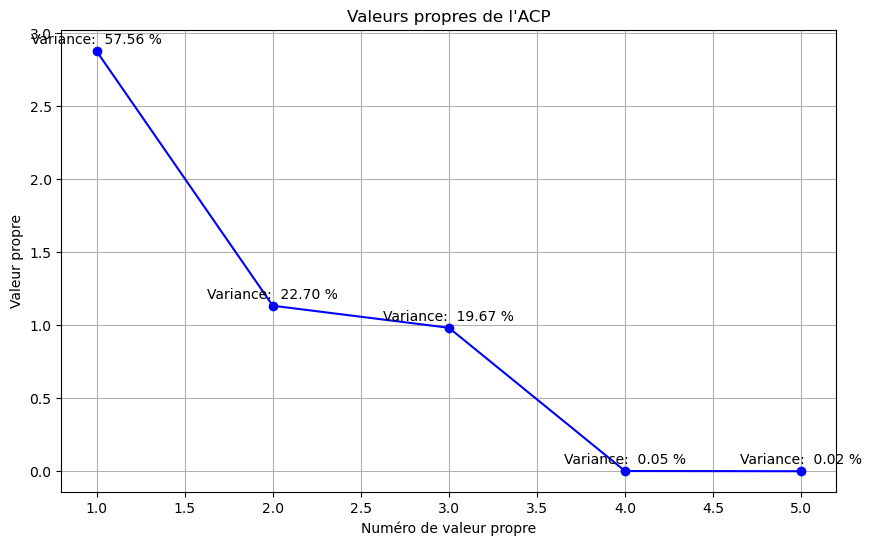

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(valeurs_propres) + 1), valeurs_propres, marker='o', linestyle='-', color='b')

# Ajouter la variance au-dessus de chaque point
for i, (valeur_propre, variance_expliquee, variance_cumul) in enumerate(zip(valeurs_propres, variance_expliquee, variance_cumulative)):
    plt.text(i + 1, valeur_propre + 0.05, f'Variance: {variance_expliquee * 100: .2f} %', ha='center')

plt.title('Valeurs propres de l\'ACP')
plt.xlabel('Numéro de valeur propre')
plt.ylabel('Valeur propre')
plt.grid(True)
plt.show()


<p>La variance totale 100% est répartie selon 5 valeurs propres.
D'où l'idée de ne garder que les valeurs propres (et directions propres) qui représentent au moins 20% de variance. Dans le cas d'une ACP normée, cela revient à conserver les valeurs propres supérieures à 1.</p>
<p>Nous pouvons observer une brusque décroissance des valeurs propres entre la troisième et la quartième valeur propre. Au final, on décide de ne garder que trois valeurs propres.</p>

**Afficher l'évolution de l'inertie expliquée cumulée selon le nombre d'axes**

[ 57.56451004  80.26080377  99.93290448  99.98037992 100.        ]


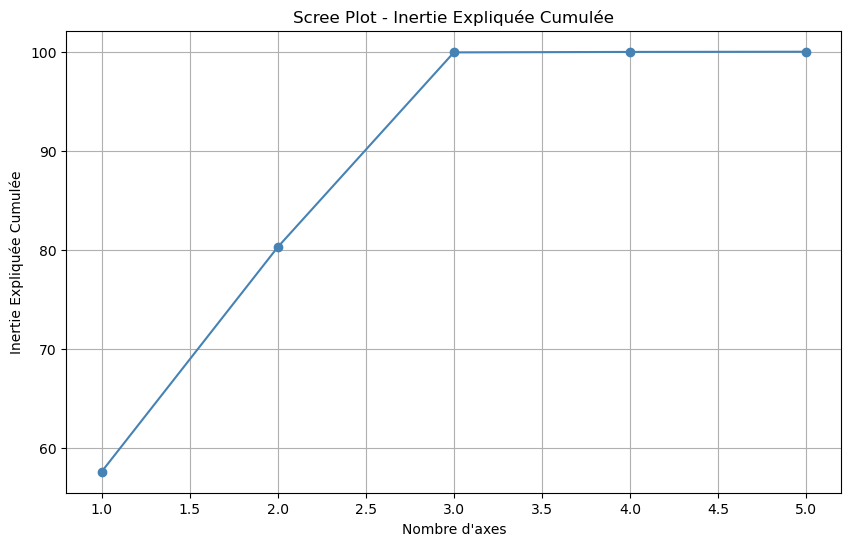

In [21]:
# Afficher l'évolution de l'inertie expliquée cumulée(Scree Plot)
print(variance_cumulative)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(variance_cumulative)+1), variance_cumulative, marker='o', linestyle='-', color='steelblue')
plt.title("Scree Plot - Inertie Expliquée Cumulée")
plt.xlabel("Nombre d'axes")
plt.ylabel("Inertie Expliquée Cumulée")
plt.grid(True)
plt.show()

**Choisir le nombre d'axes à consever**

En observant le graphique, nous observons que l'inertie expliquée cumulée montre que les trois premières composantes principales capturent environ 99.93% de la variance totale. Le point 3.0 le nombre d'axes où l'inertie cumulée commence à saturer (point d'inflexion).

In [22]:
# Choisir le nombre d'axes à conserver, selon le point d'inflexion 
nombre_axes_a_conserver = 3

**Les scores des individus représentent la projection des individus sur les nouveaux axes principaux**

In [23]:
# Extraire les composantes principales pour le nombre d'axes choisi
composantes_principales = pca_result[:, : nombre_axes_a_conserver]

# Créer un dataFrame pour les scores des individus
scores_individus = pd.DataFrame(composantes_principales, columns=[f'CP{i+1}' for i in range(nombre_axes_a_conserver)], index=df.index)

# Affichier les scores des individus
# Les scores des individus calculés après la projection sur les nouveaux axes principaux
print('Score des individus :\n', scores_individus)


Score des individus :
                CP1       CP2       CP3
jean     -2.619899 -0.653125 -0.692562
aline    -1.192570 -0.324303 -0.520830
annie    -0.970364  0.950132 -0.281146
monique   2.921509 -0.174500 -1.067741
didier    1.920498 -0.687046 -0.183510
andreas  -0.892584 -1.125417  1.085627
pierre   -0.325446  1.635105 -0.872052
brigitte  0.594902 -1.061329  0.666095
evelyne   0.563955  1.440483  1.866119


**Représenter les individus dans les plans E1 ∪E2 et E1 ∪E3**

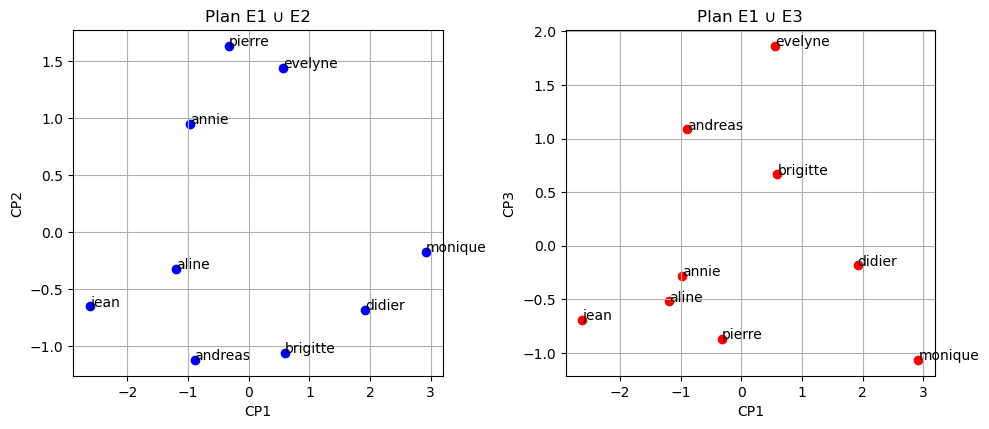

In [24]:
# Sélectionner les noms des individus pour les étiquettes du graphique
noms_individus = scores_individus.index

# Définir la taille du graphique
plt.figure(figsize=(10, 8))

# Plan E1 ∪ E2
plt.subplot(2, 2, 1)
plt.scatter(scores_individus['CP1'], scores_individus['CP2'], color='blue')
plt.title('Plan E1 ∪ E2')
plt.grid(True)
plt.xlabel('CP1')
plt.ylabel('CP2')

# Ajouter les étiquettes des individus
for nom in noms_individus:
    plt.annotate(nom, (scores_individus['CP1'][nom], scores_individus['CP2'][nom]))


# Plan E1 ∪ E3
plt.subplot(2, 2, 2)
plt.scatter(scores_individus['CP1'], scores_individus['CP3'], color='red')
plt.title('Plan E1 ∪ E3')
plt.grid(True)
plt.xlabel('CP1')
plt.ylabel('CP3')

# Ajouter les étiquettes des individus
for nom in noms_individus:
    plt.annotate(nom, (scores_individus['CP1'][nom], scores_individus['CP3'][nom]))

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

plt.grid(True)

# Afficher le graphique
plt.show()

<p>Deux graphiques sont générés pour montrer la distribution des individus dans les plans formés par les combinaisons de composantes principales.</p><p>Chaque individu est représenté par un point dans cet espace bidimensionnel, où les coordonnées sont déterminées par leurs scores respectifs sur chaque plan</p>

**Calculer les corrélations entre les variables initiales et les composantes principales**

In [25]:
# Calculer des corrélations entre variables initiales et composantes principales
corr_matrix = pd.DataFrame(columns=[f'CP{j+1}' for j in range(nombre_axes_a_conserver)], index=df.columns)

for k in range(len(df.columns)):
    for j in range(nombre_axes_a_conserver):
        correlation = (pca.components_[j, k] * np.sqrt(pca.explained_variance_[j])) / np.std(df.iloc[:, k])
        corr_matrix.at[df.columns[k], f'CP{j+1}'] = correlation

# Afficher la matrice de corrélations
print("Matrice de Corrélations entre Variables Initiales et Composantes Principales :\n", corr_matrix)


Matrice de Corrélations entre Variables Initiales et Composantes Principales :
             CP1       CP2        CP3
math   0.240121  -0.16689  0.0473657
scie   0.301228 -0.141021  0.0327456
fran   0.216868   0.17728 -0.0662397
lati   0.325567  0.136484 -0.0400095
d-m   0.0211818  0.114306   0.319171


<p>La matrice de corrélations entre les variables initiales et les trois premières composantes principales fournit une compréhension des relations entre les variables d'origine et les nouvelles dimensions extraites par l'ACP.</p>
<p>Les colonnes de la matrice sont étiquetées CP1, CP2 et CP3, représentant les trois premières composantes principales.
Les lignes de la matrice sont étiquetées par les noms des variables initiales (les matières). Les valeurs dans la matrice indiquent la force et la direction de la corrélation entre chaque variable initiale et chaque composante principale. </p>

**Tracer la représentation simultanée des individus et des variables (biplot) dans les plans E1∪E2 et E1∪E3**

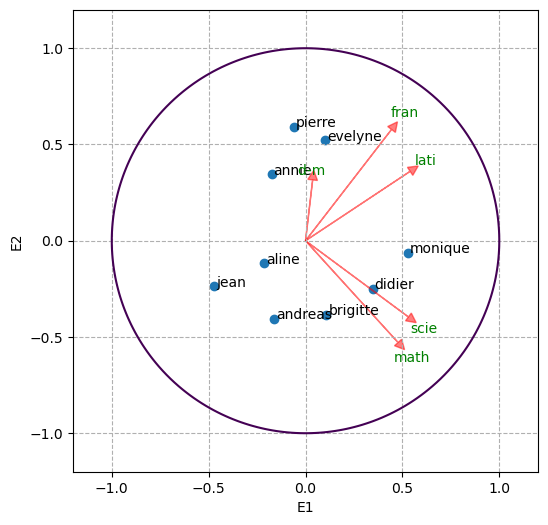

In [26]:
from affichage_acp import my_biplot

my_biplot(score=pca_result[:, 0:2], coeff=np.transpose(pca.components_[0:2, :]),
          coeff_labels=nomv, score_labels=nomi, nomx="E1", nomy="E2")

Plan E1 ∪ E2 :
Corrélations entre les Variables et les Composantes Principales (CP1 et CP2) :
Les variables "math" et "scie" semblent avoir une forte corrélation positive avec CP1.
La variable "fran" a une corrélation positive avec CP2.

Position des Individus :
Les individus sont répartis dans l'espace en fonction de leurs scores sur CP1 et CP2.
Certains individus se trouvent du côté positif de CP1, indiquant une performance élevée dans les variables corrélées positivement avec CP1.
Certains individus se trouvent du côté positif de CP2, suggérant une performance élevée dans la variable "fran".

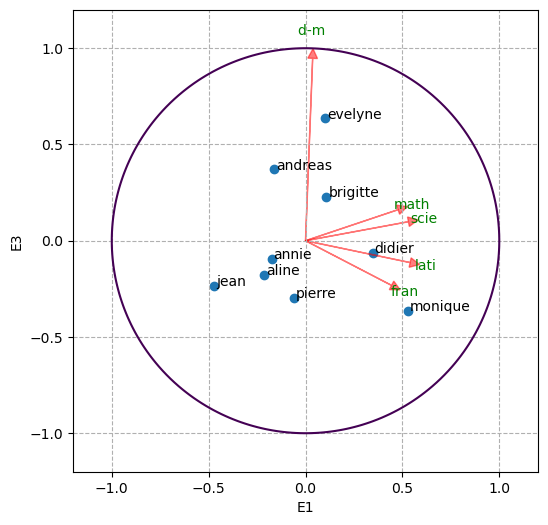

In [27]:
my_biplot(score=pca_result[:, [0, 2]], coeff=np.transpose(pca.components_[[0, 2], :]),
          coeff_labels=nomv, score_labels=nomi, nomx="E1", nomy="E3")

Corrélations entre les Variables et les Composantes Principales (CP1 et CP3) :
La variable "d-m" a une corrélation positive avec CP3.
La variable "lati" a une corrélation négative avec CP3.

Position des Individus :
Les individus sont répartis dans l'espace en fonction de leurs scores sur CP1 et CP3.
Certains individus se trouvent du côté positif de CP1, indiquant une performance élevée dans les variables corrélées positivement avec CP1.
Certains individus se trouvent du côté positif de CP3, suggérant une performance élevée dans les variables corrélées positivement avec CP3.

<h2>2. Données réelles</h2>

<h4>2.1 Charger les données avec les instructions</h4>

In [28]:
from scipy.io import loadmat

imgtmp = loadmat ("Indian_pines_corrected.mat")
img = np.float32(imgtmp['indian_pines_corrected'])
maptmp = loadmat("Indian_pines_gt.mat")
map = (maptmp['indian_pines_gt'])

<h4>2.2 Appliquer une ACP sur la tableau correspondant à l'image multispectrale</h4>

In [29]:
# Appliquer une ACP
img_reshaped = img.reshape((145*145, 200))
pca = PCA()
img_pca = pca.fit_transform(img_reshaped)

<h4>2.3 Evaluer nombre d'axes nécessaires pour conserver une grande partie de l'information</h4>

Pour évaluer le nombre d'axes nécessaires pour conserver une grande partie de l'information lors de l'application de l'ACP, nous examinons la variance expliquée cumulative. La variance expliquée indique la proportion de la variance totale des données qui est expliquée par chaque composante principale.

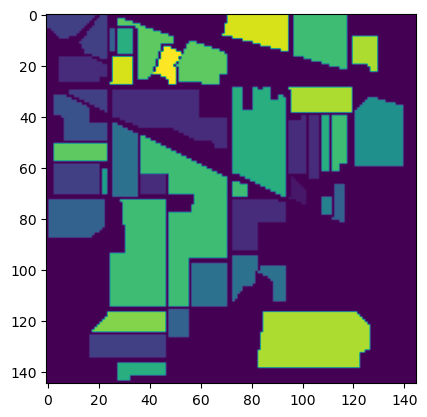

In [30]:
# Afficher composante de l'image
res = img[:,:,18]
plt.imshow((res - np.min(res)) / (np.max(res) - np.min(res)))
plt.imshow(map)

In [31]:
# Evaluer le nombre d'axes nécessaires
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# Nombre d'axes nécessaires pour conserver une grande partie de l'information
num_axes = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Nombre d'axes pour conserver 95% de l'information : {num_axes}")


Nombre d'axes pour conserver 95% de l'information : 5


Je détermine un seuil de variance expliquée cumulative, la courbe atteint environ 95% de variance expliquée cumulative à partir d'un nombre d'axes principaux.

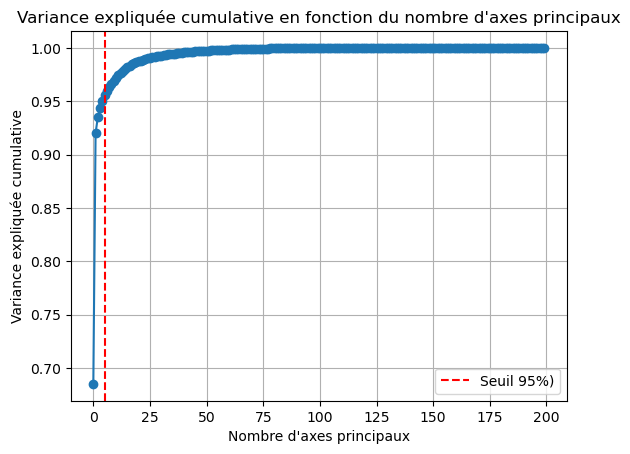

In [32]:
# Tracer la variance expliquée cumulative
plt.plot(cumulative_variance_ratio, marker='o')
plt.axvline(x=num_axes, color='red', linestyle='--', label=f'Seuil 95%)')
plt.xlabel('Nombre d\'axes principaux')
plt.ylabel('Variance expliquée cumulative')
plt.title('Variance expliquée cumulative en fonction du nombre d\'axes principaux')
plt.legend()
plt.grid(True)
plt.show()

En utilisant l'analyse en composantes principales sur les données initiales de l'image multispectrale, nous pouvons conclure :
<p><strong>Réduction de la dimension : </strong>En passant de 200 dimensions initiales à 5 dimensions (axes principaux), nous avons réalisé une réduction significative de la dimensionnalité tout en conservant la majeure partie de l'information contenue dans les données.</p>
<p><strong>Perte d'information minimale : </strong></p>Bien que nous ayons considérablement réduit la dimensionnalité, la perte d'information est relativement faible (environ 5%). Cela indique que la nouvelle représentation avec seulement 5 axes principaux conserve une grande partie de la variabilité des données d'origine.</p>
<p><strong>Structure principale capturée : </strong>La variance expliquée cumulative atteint rapidement un plateau, indiquant que les premiers axes principaux capturent la structure principale des données. Cela suggère que la majorité de l'information utile est contenue dans ces premiers axes.</p>

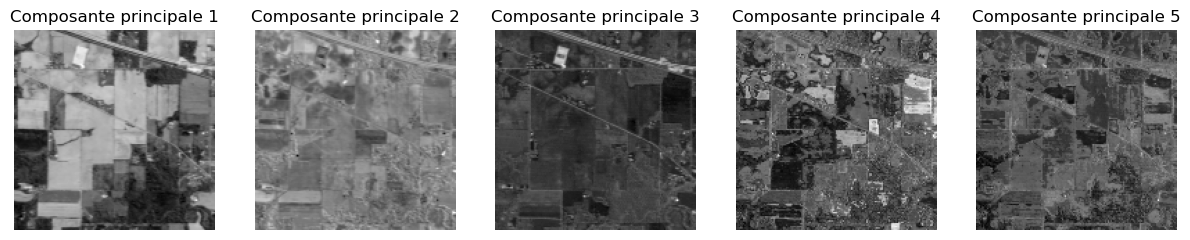

In [33]:
#Remodeler l'image pour la PCA
num_pixels = img.shape[0] * img.shape[1]
img_reshaped = img.reshape((num_pixels, img.shape[2]))

#Effectuer l'ACP sur les données remodelées pour obtenir cinq composantes principales
pca = PCA(n_components=5)
img_pca = pca.fit_transform(img_reshaped)

# Visualiser les composantes principales sous forme d'images en niveaux de gris côte à côte
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Une ligne de 5 colonnes

for i in range(5):
    component_image = img_pca[:, i].reshape(img.shape[0], img.shape[1])
    axes[i].imshow(component_image, cmap='gray')
    axes[i].set_title(f'Composante principale {i+1}')
    axes[i].axis('off')  # Désactiver les axes pour une meilleure apparence

plt.show()

<h4>2.4 Visualiser sous forme d'une image en niveaux de gris et couleur la projection sur le principal axe factoriel</h4>

* Visualiser sous forme d'une image en niveaux de gris la projection sur le principal axe factoriel

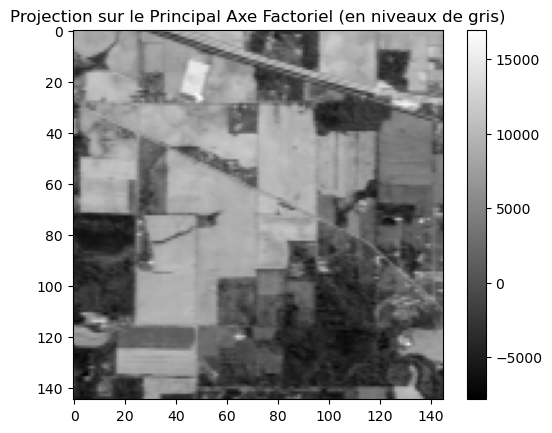

In [34]:
# Sélectionner le principal axe factoriel
principal_component = pca.components_[0]

# Projecter les données originales sur le principal axe factoriel
projection_sur_principal_axe = np.dot(img_reshaped, principal_component)

# Remettre la projection sous la forme d'une image de deux dimension
projection_image = projection_sur_principal_axe.reshape(145,145)

# Visualiser l'image en niveaux de gris
plt.imshow(projection_image, cmap='gray')
plt.title('Projection sur le Principal Axe Factoriel (en niveaux de gris)')
plt.colorbar()
plt.show()

L'image en niveaux de gris représente la projection des données originales sur le principal axe factoriel. Les valeurs plus claires indiquent une variation plus importante dans la direction du principal axe, tandis que les valeurs plus sombres indiquent une variation moindre.

* Visualiser sous la forme d'une image couleur la projection sur les principaux axes factoriels

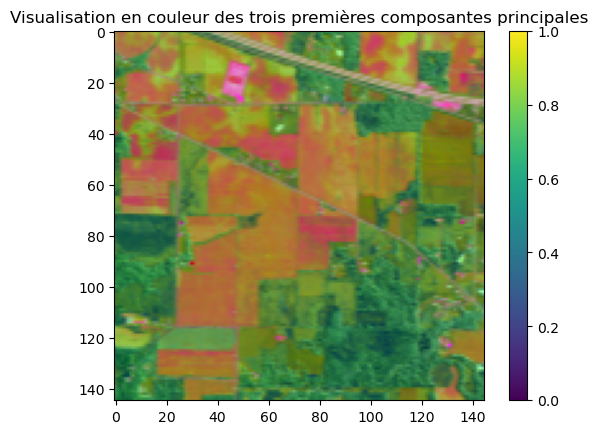

In [35]:
img_rgb = np.zeros((img.shape[0], img.shape[1], 3))
for i in range(3):
    # Normaliser et remodeler les trois premières composantes principales pour l'affichage en couleur
    component = img_pca[:, i].reshape(img.shape[0], img.shape[1])
    img_rgb[:, :, i] = (component - np.min(component)) / (np.max(component) - np.min(component))

plt.imshow(img_rgb)
plt.colorbar()
plt.title('Visualisation en couleur des trois premières composantes principales')
plt.show()

<h4>2.5 Comparer avec la réalité terrain</h4>

* Calculer les corrélations entre les variables initiales (longueur d'ondes) et les composantes principales

In [36]:
correlations = np.corrcoef(img_reshaped.T, img_pca.T)
correlations

array([[ 1.00000000e+00,  6.85887439e-02,  7.74942364e-02, ...,
         2.27359054e-01,  3.28568282e-02, -5.40543990e-02],
       [ 6.85887439e-02,  1.00000000e+00,  8.02969594e-01, ...,
         1.97733060e-01,  9.36760009e-02,  9.23303179e-02],
       [ 7.74942364e-02,  8.02969594e-01,  1.00000000e+00, ...,
         1.94453053e-01,  9.58917293e-02,  7.87602239e-02],
       ...,
       [ 2.27359054e-01,  1.97733060e-01,  1.94453053e-01, ...,
         1.00000000e+00, -1.21592117e-07,  2.20181751e-07],
       [ 3.28568282e-02,  9.36760009e-02,  9.58917293e-02, ...,
        -1.21592117e-07,  1.00000000e+00,  1.25020555e-07],
       [-5.40543990e-02,  9.23303179e-02,  7.87602239e-02, ...,
         2.20181751e-07,  1.25020555e-07,  1.00000000e+00]])

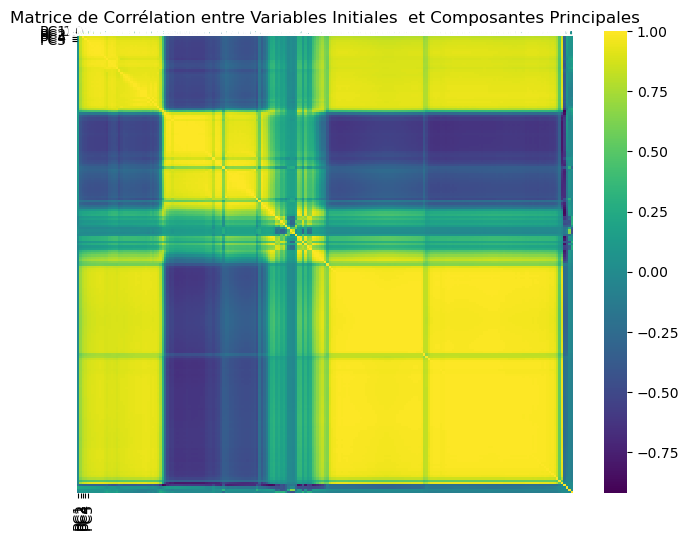

In [37]:
# Afficher la matrice de corrélation sous forme de heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, cmap='viridis', xticklabels= [f'PC{i+1}' for i in range(5)],
            yticklabels= [f'PC{i+1}' for i in range(5)], annot=True, fmt=".2f")
plt.title('Matrice de Corrélation entre Variables Initiales  et Composantes Principales')
plt.show()

Les corrélations entre les longueurs d'ondes initiales et les composantes principales peuvent être interprétées comme la relation linéaire entre ces deux ensembles de données.
Plus la corrélation est élevée, plus la composante principale capture l'information contenue dans les longueurs d'ondes d'origine.

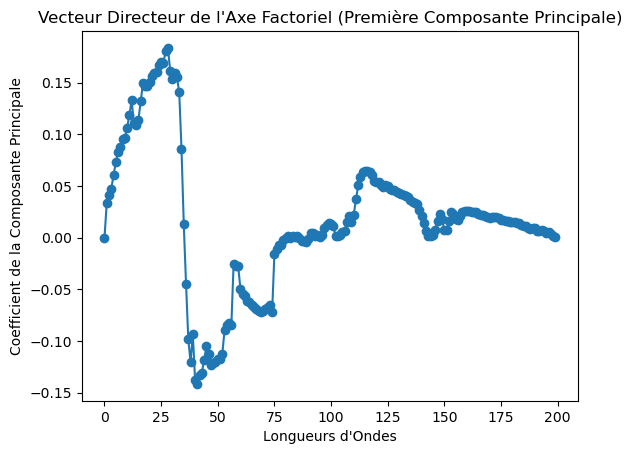

In [38]:
# Vecteur directeur de l'axe factoriel (coefficient de la première composante principale)
vecteur_directeur = pca.components_[0, :]

# Afficher le vecteur directeur
plt.plot(vecteur_directeur, marker='o')
plt.xlabel('Longueurs d\'Ondes')
plt.ylabel('Coefficient de la Composante Principale')
plt.title('Vecteur Directeur de l\'Axe Factoriel (Première Composante Principale)')
plt.show()


Le graphique du vecteur directeur de l'axe factoriel pour la première composante principale montre les coefficients de cette composante pour chaque longueur d'onde.
Des coefficients importants indiquent quelles longueurs d'ondes contribuent le plus à la première composante principale. En examinant le vecteur directeur, nous pouvons identifier les longueurs d'ondes les plus importantes pour la première composante principale.

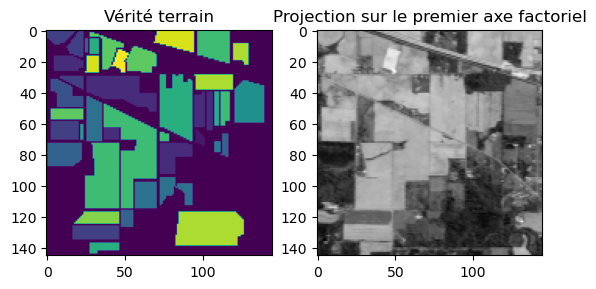

In [39]:
# Comparer avec la vérité terrain
plt.subplot(1, 2, 1)
plt.imshow(map)
plt.title('Vérité terrain')

plt.subplot(1, 2, 2)
plt.imshow(projection_image, cmap='gray')
plt.title('Projection sur le premier axe factoriel')
plt.show()


La comparaison avec la réalité terrain suggère que la réduction de dimension par l'ACP a été bien réalisée, avec une conservation significative de l'information utile des longueurs d'ondes d'origine dans les premières composantes principales.

<h4>2.6 Afficher l'axe k la signature spectrale de l'axe</h4>

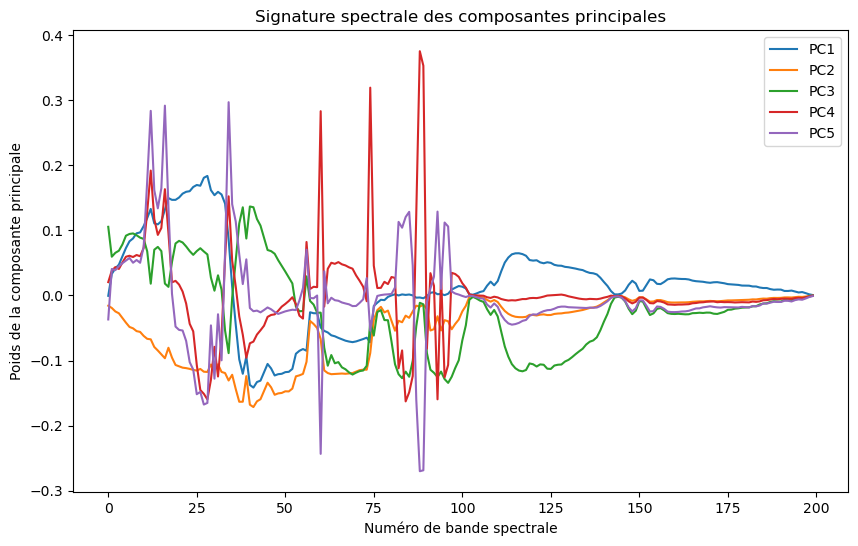

In [40]:
# Tracer la signature spectrale pour la première composante principale
plt.figure(figsize=(10, 6))
plt.plot(pca.components_[0, :], label='PC1')

# Tracer la signature spectrale pour la deuxième composante principale
plt.plot(pca.components_[1, :], label='PC2')

# Tracer la signature spectrale pour la troisième composante principale
plt.plot(pca.components_[2, :], label='PC3')

# Tracer la signature spectrale pour la quatrième composante principale
plt.plot(pca.components_[3, :], label='PC4')

# Tracer la signature spectrale pour la cinquième composante principale
plt.plot(pca.components_[4, :], label='PC5')

plt.xlabel('Numéro de bande spectrale')
plt.ylabel('Poids de la composante principale')
plt.title('Signature spectrale des composantes principales')
plt.legend()
plt.show()

La signature spectrale des composantes principales peut fournir des informations sur les longueurs d'ondes qui contribuent le plus à chaque composante principale.
Les pics ou les creux dans les courbes indiquent les bandes spectrales qui ont une influence significative sur chaque composante principale. Si certaines bandes spectrales ont des pics ou des creux particulièrement prononcés, cela suggère que ces longueurs d'ondes spécifiques contribuent fortement à la variance capturée par la composante principale correspondante.